## Case de IA - Customer churn

<p align='center'>
    <img src='https://www.questionpro.com/blog/wp-content/uploads/2018/03/churn.png'>
</p>

Neste case básico de IA, vamos analisar um dataset de churn de clientes de uma empresa de telecomunicações. O objetivo é criar um modelo de Machine Learning que seja capaz de prever se um cliente irá ou não cancelar seu plano.


O objetivo é que você tenha seu primeiro contato com um problema de Machine Learning, que você consiga entender como é mais ou menos o fluxo de trabalho e, principalmente, vá aprendendo os principais conceitos conforme for realizando.


Ao longo do case passaremos por tópicos como:

1. Visualização, análise e tratamento de dados
2. Split dos dados em treino e teste
3. Padronização dos dados
4. Criação de um modelo de Machine Learning
5. Avaliação do modelo
6. Otimização dos hiperparâmetros do modelo


## Referências gerais:
- https://www.datacamp.com/tutorial/introduction-machine-learning-python
- https://app.datacamp.com/learn/courses/machine-learning-with-scikit-learn (Capítulos 1 e 3)
- Livro: Introduction to Machine Learning with Python (Capítulo 2) - https://drive.google.com/drive/u/1/folders/10VdWCaR7qZ40K9rC5gWviKWMkMPzK8FB

Mais referências ao longo do case

### 0 - Antes de tudo...

Existem muitas formas de se resolver um problema de Machine Learning, no entanto, o **workflow** a ser seguido geralmente segue essa estrutura:
<p align='center'>
    <img src='https://editor.analyticsvidhya.com/uploads/80329Roadmap.PNG'>
</p>

Assim, comece importando as bibliotecas básicas, e carregando o dataset.

In [1]:
# Carrega as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importação do dataset
raw_data = pd.read_csv('Churn_train.csv', index_col=0)
raw_data = raw_data.dropna()
raw_data

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
CustomerID,,,,,,,,,,,
2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0


### 1 - Data Prep

Provavelmente, a etapa mais importante do processo. É a etapa de entendimento do problema a ser resolvido, entendimento dos dados que você possui e, principalmente, tratamento desses dados para poder extrair o máximo de informação possível.

Veja aqui algumas referências para um bom Data Prep:
- https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/
- https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e

O objetivo aqui é verficar se os dados estão certinhos para serem utilizados em modelos. Assim,

- Verifique o tipo das variáveis (existem números como strings, por exemplo?)  
- Verifique se há valores nulos
- Verifique se há valores duplicados
- Verifique a presença de outliers (aqui pode ser bem útil plotar gráficos de distribuição das variáveis)
- Qual coluna é a variável *target* (aquilo que queremos prever)?
- Quais features são necessárias e quais não são?

In [3]:
# Verifica as infos básicas do dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 2.0 to 449999.0
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 40.4+ MB


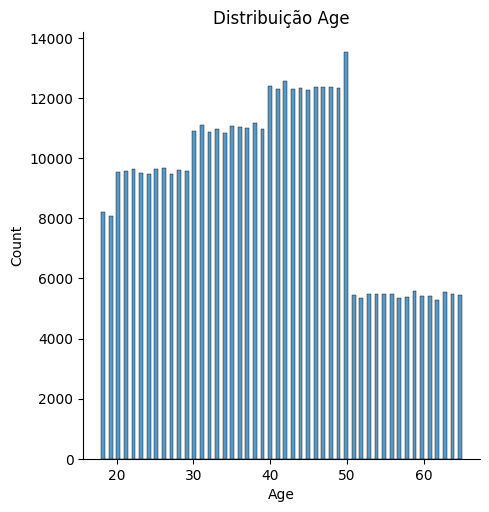

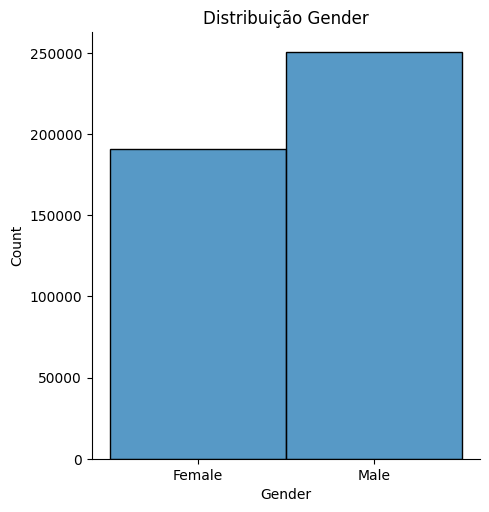

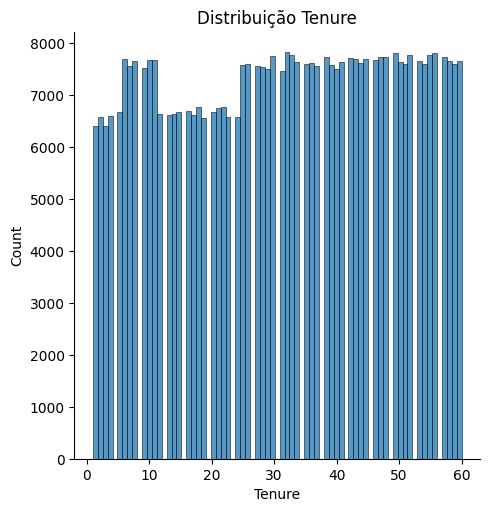

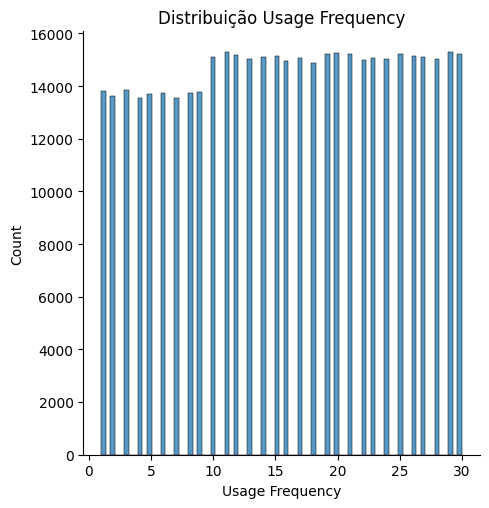

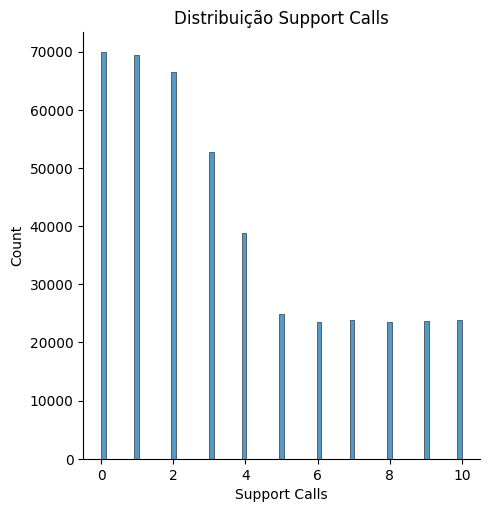

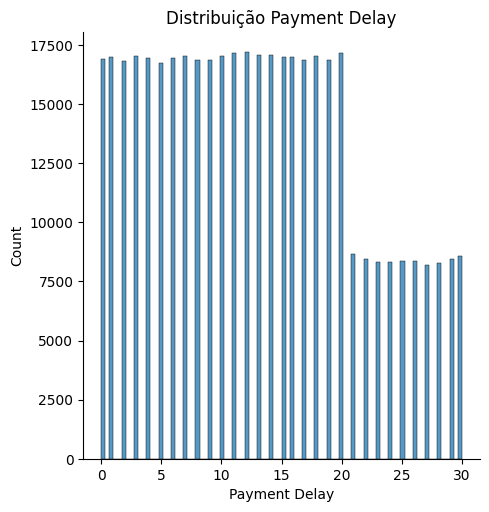

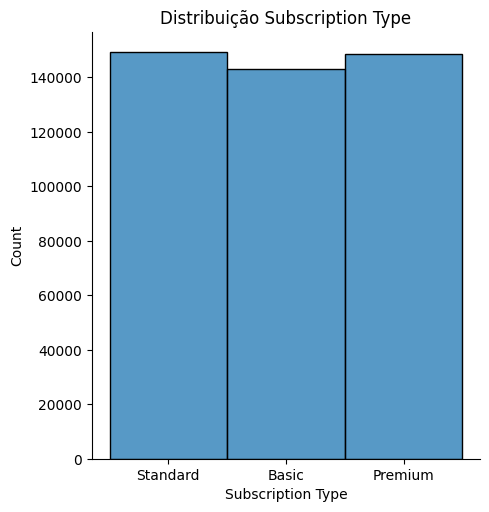

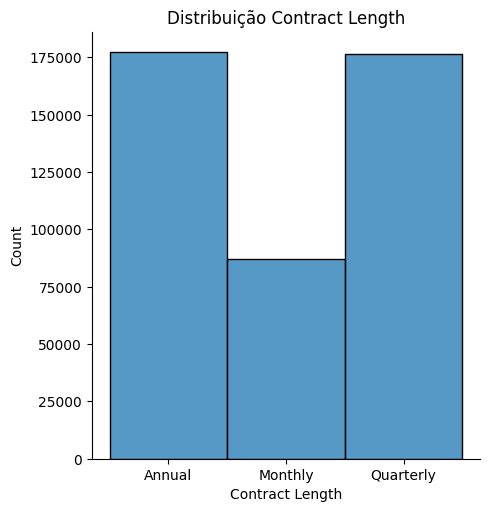

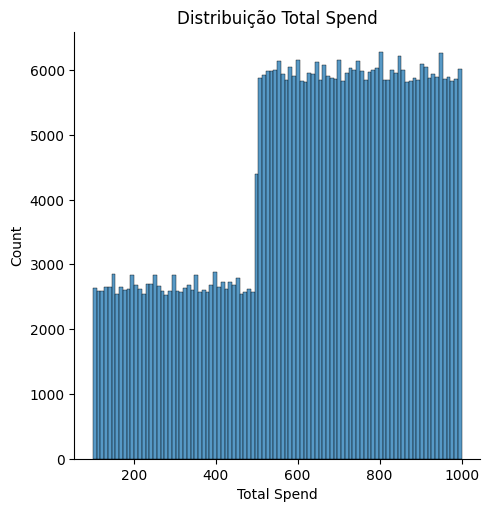

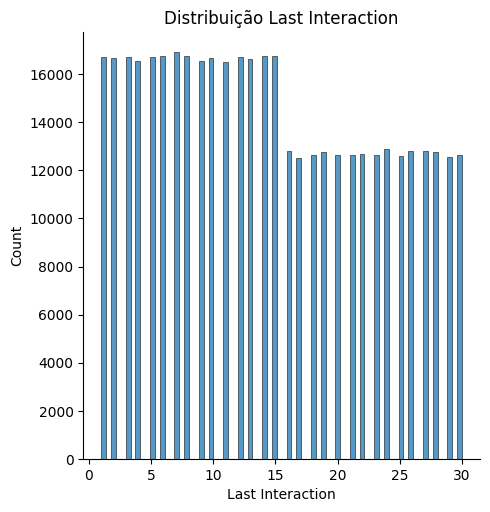

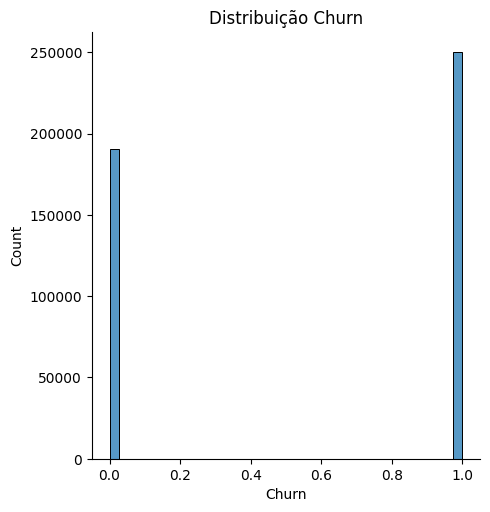

In [4]:
# Gráfico de distribuição

# Itera por cada coluna do dataset
for c in raw_data.columns:
    # Para cada coluna, plota um gráfico de distribuição
    sns.displot(raw_data[c], kde=False)
    
    # Adiciona título
    plt.title(f'Distribuição {c}')

    # Exibe o gráfico
    plt.show()

### Encoding

Muitos algoritmos não só conseguem trabalhar com dados numéricos. Assim, um tratamento necessário é a transformação de variáveis categóricas em numéricas. 

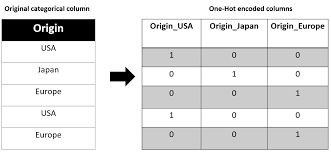

São formas de encoding mais comuns:
- Dummy encoding
- One-hot encoding
- Label encoding

Dê uma pesquisada nesses métodos e veja qual a forma mais adequada para as variáveis categóricas

In [5]:
# Transforma a coluna Gender em dummy com 1 para Mulher e 0 para Homem
dataset = raw_data.copy()
dataset['Gender'] = dataset['Gender'].replace({'Female': 1, 'Male': 0}) # Dummy encoding

C:\Users\felip\AppData\Local\Temp\ipykernel_23644\3839222330.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Gender'] = dataset['Gender'].replace({'Female': 1, 'Male': 0})


In [6]:
# Para as colunas Subscription Type e Contract Lenght
# Precisamos utilizar o método One Hot Enconding

from sklearn.preprocessing import OneHotEncoder

# Inicia o objeto One Hot Encoder do Scikit Learn
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

# Aplica o One Hot Enconding na coluna de Subscription Type
sub_type_transform = ohe.fit_transform(dataset[['Subscription Type']])

# Aplica o One Hot Enconding na coluna de Contract Length
contract_transform = ohe.fit_transform(dataset[['Contract Length']])

# Concatena tudo em um unico dataframe feitas as devidas transformações
dataset = pd.concat([dataset, sub_type_transform, contract_transform], axis=1).drop(columns=['Subscription Type', 'Contract Length'])
dataset

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
CustomerID,,,,,,,,,,,,,,,
2.0,30.0,1,39.0,14.0,5.0,18.0,932.00,17.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3.0,65.0,1,49.0,1.0,10.0,8.0,557.00,6.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4.0,55.0,1,14.0,4.0,6.0,18.0,185.00,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5.0,58.0,0,38.0,21.0,7.0,7.0,396.00,29.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6.0,23.0,0,32.0,20.0,5.0,8.0,617.00,20.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995.0,42.0,0,54.0,15.0,1.0,3.0,716.38,8.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
449996.0,25.0,1,8.0,13.0,1.0,20.0,745.38,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
449997.0,26.0,0,35.0,27.0,1.0,5.0,977.31,9.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Matriz de correlação
Uma forma eficiênte de se ter uma ideia da relação entre as variáveis é saber como elas se correlacionam umas com as outras. Plote uma matriz de correlação e veja quais variáveis parecem mais correlacionadas com o target.

<Axes: >

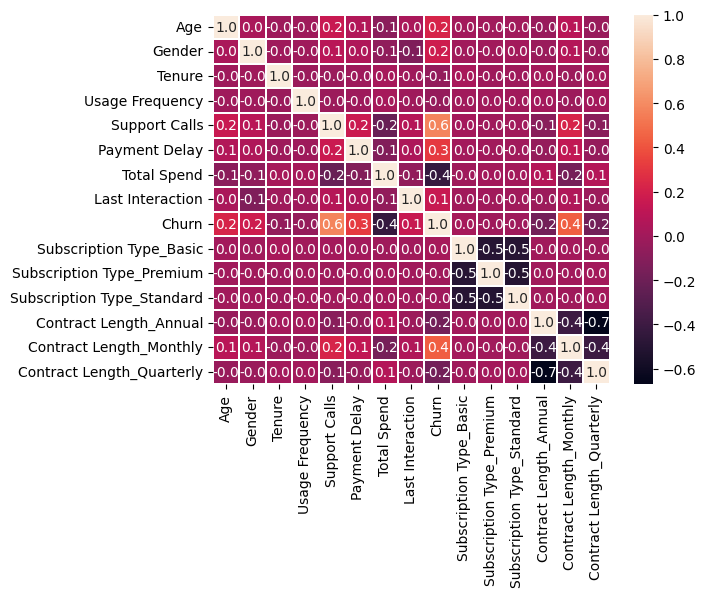

In [7]:
# Plota matriz de correlação
matriz = sns.heatmap(dataset.corr(), annot=True, fmt=".1f", linewidths=.2)
matriz

#### Bônus
Uma coisa que vocês precisam saber é que, apesar de parecer muito difícil no começo, Machine Learning em python é uma mãe e sempre existe uma forma mais incrivelmente fácil de se fazer qualquer coisa.

Depois de fazer toda a sua análise exploratória, teste o *pandas_profiling* e veja o que ele te retorna.

In [8]:
from ydata_profiling import ProfileReport

profile = ProfileReport(dataset)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Data split
Para um algoritmo de Machine Learning funcionar, é necessário que ele primeiro aprenda com uma certa quantidade dos dados disponíveis a identificar padrões. A esse conjunto, chamamos de "treino".

Após o treino, é necessário verficar como ele lida diante de novos dados. Esse conjunto com a outra parte dos dados, chamamos de "teste". Sendo assim, divida seu dataset em treino e teste.

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dataset.drop(columns='Churn'), dataset['Churn'], test_size=0.2, random_state=42)

### Scaling
Último ponto dessa etapa. Veja que as variáveis possuem escalas diferentes. Enquanto algumas variáveis estão na casa das dezenas, outras estão na casa das centenas. Isso pode ser um problema para alguns algoritmos de Machine Learning, que podem acabar dando mais importância para as variáveis com maior escala. Transforme seus dados de modo com que fiquem na mesma escala

In [10]:
# Seleciona colunas que necessitam ser aplicadas o scaling
col_names = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
             'Total Spend', 'Last Interaction']

# Importa a biblioteca de scaling do sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 10))

# Aplica scaling nos dados de treino e test
x_train_scaled = scaler.fit_transform(x_train[col_names])
x_test_scaled = scaler.transform(x_test[col_names]) # ? Por que só transform nos dados de teste?

# Converte as colunas scaled dos dados de treino em dataframe 
df_x_train_scaled = pd.DataFrame(x_train_scaled, columns=col_names, index=x_train.index)

# Converte as colunas scaled dos dados de teste em dataframe 
df_x_test_scaled = pd.DataFrame(x_test_scaled, columns=col_names, index=x_test.index)

# Concatena as colunas scaled com as colunas dummy dos dados de treino
x_train_final = pd.concat([df_x_train_scaled, x_train.drop(columns=col_names)], axis=1)

# Concatena as colunas scaled com as colunas dummy dos dados de teste
x_test_final = pd.concat([df_x_test_scaled, x_test.drop(columns=col_names)], axis=1)

### 2 - Criação do modelo

Existem dois principais tipos de problemas de ML: regressão e classificação. Enquanto o primeiro se refere à previsão de valores numéricos, o segundo, como o nome já diz, se refere à classificação de valores em categorias.

Para classificação, existem alguns algoritmos mais comuns que você pode tentar:
Cursos:
- [Supervised Learning with scikit-learn - DataCamp](https://app.datacamp.com/learn/courses/machine-learning-with-scikit-learn)
- [Linear Classifiers in python - DataCamp](https://app.datacamp.com/learn/courses/linear-classifiers-in-python)

Vídeos:
- [Vídeo do Dev sobre Random Forest](https://www.youtube.com/watch?v=ho1eI54ykoU&pp=ygUHZmVhIGRldg%3D%3D)
- [StatsQuest: LogisticRegression (teoria)](https://www.youtube.com/watch?v=yIYKR4sgzI8)
- [StatsQuest: KNN (teoria)](https://www.youtube.com/watch?v=HVXime0nQeI&pp=ugMICgJwdBABGAE%3D)


Escolha pelo menos dois modelos. Treine e teste com os dados que você separou anteriormente e gere as previsões

In [12]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Cria a classe RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=18)

# Ajusta algoritmo a base de dados
rf_classifier.fit(x_train_final, y_train)

# Preve os resultados
y_pred_rf = rf_classifier.predict(x_test_final)

# Compara os valores reais com os valores preditos
random_forest_df = pd.DataFrame({'Real Values': y_test, 'Predict Values': y_pred_rf})

# Printa a acuracia do modelo Random Forest
accuracy_score(y_test, y_pred_rf)

0.9752515113364411

In [13]:
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cria a classe KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Ajusta o modelo a base de dados
knn_classifier.fit(x_train_final, y_train)

# Preve os resultados
y_pred_knn = knn_classifier.predict(x_test_final)

# Printa a acuracia do modelo KNN
accuracy_score(y_test, y_pred_knn)

0.9562194471854549

### 3 - Avaliação do modelo

Uma vez feitas as previsões, é preciso verificar o quão próximas da realidade elas foram. Para problemas de classificação, as métricas mais comuns de se utilizar são: acurácia, precisão e AUC. Você pode ter uma melhor visualização nesse cheat sheet:

<p align='center'>
    <img src='https://miro.medium.com/v2/resize:fit:828/format:webp/1*wEniP5HewaUSHeIF1_bEiw.png'>

Para um entendimento mais profundo sobre cada uma das métricas, seguem também algumas referências:

- [StatsQuest: ROC e AUC](https://www.youtube.com/watch?v=4jRBRDbJemM&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=7)
- [StatsQuest: Confusion Matrix](https://www.youtube.com/watch?v=Kdsp6soqA7o&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=3)
- [12 Important Model Evaluation Metrics for Machine Learning Everyone Should Know ](https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/)

**Avalie as previsões do seu modelo e veja qual deles se saiu melhor.**

<Axes: title={'center': 'Matriz de Confusão - Random Forest (em milhares)'}>

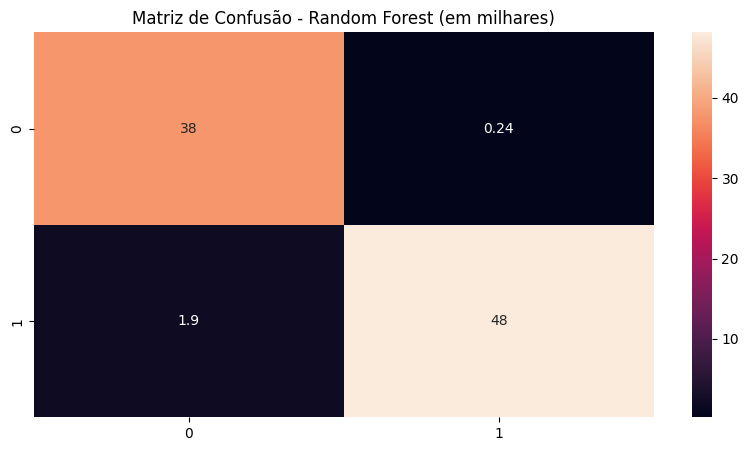

In [14]:
# Avaliação do modelo Random Forest
# Matriz de confusão
from sklearn.metrics import confusion_matrix

# Cria a matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf) / 1000
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()

# Cria mapa de calor da matriz de confusão
plt.figure(figsize=(10,5))
plt.title('Matriz de Confusão - Random Forest (em milhares)')
sns.heatmap(cm_rf, annot=True)

In [15]:
# Calcula sensitivity random forest
sensitivity_rf = tp_rf / (tp_rf + fn_rf)
print(f'Sensitivity Random Forest: {sensitivity_rf}')

# Calcula specificity random forest
specificity_rf = tn_rf / (tn_rf + fp_rf)
print(f'Specificity Random Forest: {specificity_rf}')

Sensitivity Random Forest: 0.9612206610250679
Specificity Random Forest: 0.9937209363423798


<Axes: title={'center': 'Matriz de Confusão - K-Nearest Neighbor (em milhares)'}>

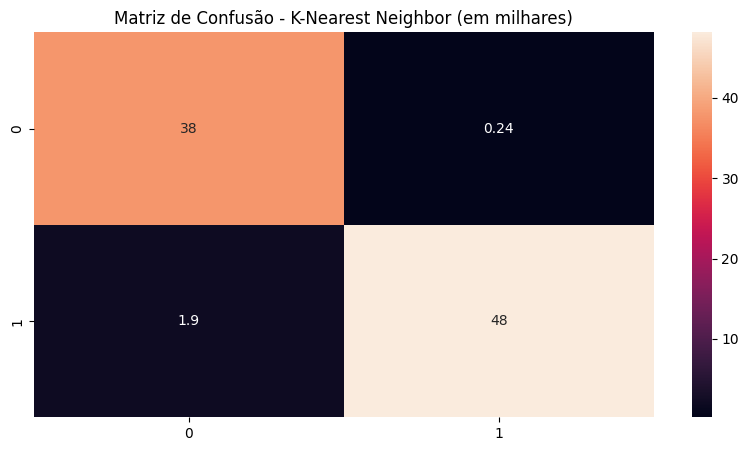

In [16]:
# Avaliação do modelo K-Nearest Neighbor
# Matriz de confusão
from sklearn.metrics import confusion_matrix

# Cria a matriz de confusão
cm_knn = confusion_matrix(y_test, y_pred_knn) / 1000
tn_knn, fp_knn, fn_knn, tp_knn = cm_knn.ravel()

# Cria mapa de calor da matriz de confusão
plt.figure(figsize=(10,5))
plt.title('Matriz de Confusão - K-Nearest Neighbor (em milhares)')
sns.heatmap(cm_rf, annot=True)

In [24]:
# Calcula sensitivity K-nearest neighbor
sensitivity_knn = tp_knn / (tp_knn + fn_knn)
print(f'Sensitivity K-Nearest Neighbor: {sensitivity_knn}')

# Calcula specificity K-nearest neighbor
specificity_knn = tn_knn / (tn_knn + fp_knn)
print(f'Specificity K-Nearest Neighbor: {specificity_knn}')

Sensitivity K-Nearest Neighbor: 0.9247365479802012
Specificity K-Nearest Neighbor: 0.9976617712739406


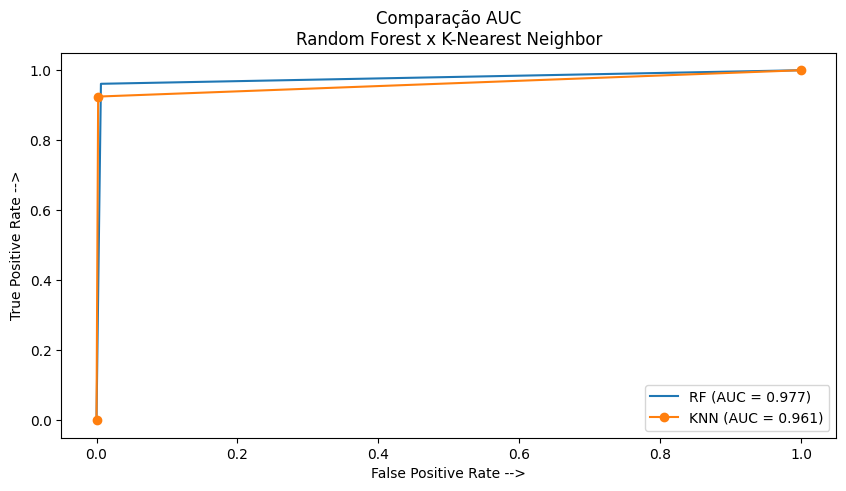

In [18]:
# Plot ROC e compara AUC
from sklearn.metrics import roc_curve, auc

# Random Forest
rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred_rf)
auc_rf = auc(rf_fpr, rf_tpr)

# K-Nearest neighbor
knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

# Plota as AUCs
plt.figure(figsize=(10,5), dpi=100)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label=f'RF (AUC = {auc_rf.round(3)})')
plt.plot(knn_fpr, knn_tpr, marker='o', label=f'KNN (AUC = {auc_knn.round(3)})')

plt.title('Comparação AUC\nRandom Forest x K-Nearest Neighbor')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()


### 4 - Otimização do modelo
Cada função do scikit-learn na verdade tem vários parâmetros que podem ser ajustados a depender dos seus dados e do seu objetivo e nem sempre os valores padrão são os melhores. O processo de otimização desses hiperparâmetros nada mais é do que iterar sobre as diferentes possibilidades de valores que esses parâmetros podem assumir e ver qual combinação deles gera o melhor resultado.

A forma mais comum de realizar essa otimização é através do GridSearch CV, mas a biblioteca Optuna também é uma excelente opção.

O capítulo 3 do curso de Supervised Learning oferece um guia de como realizar esse processo - https://app.datacamp.com/learn/courses/supervised-learning-with-scikit-learn

**Realize a otimização dos hiperparâmetros**

### Hyperparameter tunning

In [22]:
# Hyperparameter tunning Random Forest
from sklearn.model_selection import GridSearchCV

# Seleciona os parâmetros a serem testados
rf_parametros = {'n_estimators': [100, 200],
                 'random_state': [18],
                 'max_depth': [5]}

# Importa o modelo usando GridSearchCV
rf_model_tuning = GridSearchCV(RandomForestClassifier(), param_grid=rf_parametros)

# Treina o modelo
rf_model_tuning.fit(x_train_final, y_train)

# Printa os resultados
print(rf_model_tuning.best_params_)
print(rf_model_tuning.best_estimator_)
print(rf_model_tuning.best_score_)

{'max_depth': 5, 'n_estimators': 100, 'random_state': 18}
RandomForestClassifier(max_depth=5, random_state=18)
0.9753817362085833


In [23]:
# Hyperparameter tunning K-Nearest Neighbor
from sklearn.model_selection import GridSearchCV

# Seleciona os parâmetros a ser testados
knn_parametros = {'n_neighbors': [3, 5]}

# Importa o modelo usando GridSearchCV
knn_model_tuning = GridSearchCV(KNeighborsClassifier(), param_grid=knn_parametros)

# Treina o modelo
knn_model_tuning.fit(x_train_final, y_train)

# Printa os resultados
print(knn_model_tuning.best_params_)
print(knn_model_tuning.best_estimator_)
print(knn_model_tuning.best_score_)

{'n_neighbors': 3}
KNeighborsClassifier(n_neighbors=3)
0.9561425148512044
